# Segmentación de Clientes con Segmentación Manual

En este notebook se utiliza una base de datos de e-commerce para segmentar clientes de forma manual a partir de las métricas calculadas en el análisis:

- **Total Revenue**: Ingreso total por cliente.
- **Total Units**: Cantidad total de productos comprados.
- **NumCategories**: Número de categorías (diversidad de productos) compradas.

Además, se agrupa la variable numérica **age** con pd.cut para ver cómo se distribuyen las compras en función de grupos etarios.

El objetivo es definir segmentos (por ejemplo, "Bajo", "Medio" y "Alto" en Total Revenue) que sirvan para orientar estrategias de negocio, sin utilizar algoritmos de clustering complejos.

In [ ]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
!unzip customer_shopping_data.csv.zip

--2025-03-27 20:39:01--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-03-27 20:39:01--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip’

cus

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
%matplotlib inline
sns.set(style='whitegrid')

## 1. Carga y Preprocesamiento de Datos

Utilizamos una base de datos sintética basada en la siguiente estructura:

- **invoice_no**
- **customer_id**
- **gender**
- **age**
- **category**
- **quantity**
- **price**
- **payment_method**
- **invoice_date**
- **shopping_mall**

Se convierte la fecha a datetime y se calcula la métrica *Revenue* (quantity * price).

In [ ]:
# Crear DataFrame con datos de ejemplo
df = pd.read_csv('customer_shopping_data.csv')


In [ ]:

# Convertir invoice_date a datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')

# Calcular Revenue
df['Revenue'] = df['quantity'] * df['price']

print('Datos transaccionales:')
df

Datos transaccionales:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Revenue
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,16800.00


## 2. Análisis Exploratorio

Utilizamos pivot tables y crosstabs para explorar la distribución de ingresos y transacciones por diferentes dimensiones.

In [ ]:
revenue_by_category = pd.pivot_table(df, values='Revenue', index='category', aggfunc=np.sum)
print(revenue_by_category)
revenue_by_gender = pd.pivot_table(df, values='Revenue', index='gender', aggfunc=np.sum)
print(revenue_by_gender)


                      Revenue
category                     
Books            8.345529e+05
Clothing         1.139968e+08
Cosmetics        6.792863e+06
Food & Beverage  8.495351e+05
Shoes            6.655345e+07
Souvenir         6.358247e+05
Technology       5.786235e+07
Toys             3.980426e+06
             Revenue
gender              
Female  1.502071e+08
Male    1.012987e+08


<ipython-input-10-24e94ebbe2e8>:1: FutureWarning: The provided callable <function sum at 0x7d84bfdfc2c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  revenue_by_category = pd.pivot_table(df, values='Revenue', index='category', aggfunc=np.sum)
<ipython-input-10-24e94ebbe2e8>:3: FutureWarning: The provided callable <function sum at 0x7d84bfdfc2c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  revenue_by_gender = pd.pivot_table(df, values='Revenue', index='gender', aggfunc=np.sum)


In [ ]:
transactions_by_category_gender = pd.crosstab(df['category'], df['gender'])
print(transactions_by_category_gender)

transactions_by_payment_method = pd.crosstab(df['payment_method'], df['shopping_mall'])
print(transactions_by_payment_method)

gender           Female   Male
category                      
Books              2906   2075
Clothing          20652  13835
Cosmetics          9070   6027
Food & Beverage    8804   5972
Shoes              5967   4067
Souvenir           3017   1982
Technology         2981   2015
Toys               6085   4002
shopping_mall   Cevahir AVM  Emaar Square Mall  Forum Istanbul  Istinye Park  \
payment_method                                                                 
Cash                   2228               2114            2183          4436   
Credit Card            1779               1696            1750          3422   
Debit Card              984               1001            1014          1923   

shopping_mall   Kanyon  Mall of Istanbul  Metrocity  Metropol AVM  \
payment_method                                                      
Cash              8853              8894       6625          4559   
Credit Card       6916              7019       5347          3521   
Debit Card   

## 3. Agregación a Nivel de Cliente

Agrupamos las transacciones por **customer_id** y **category** para obtener la cantidad total de cada producto comprado por cliente.

In [ ]:
customer_product_quantity = df.groupby(['customer_id', 'category'])['quantity'].sum().reset_index()
customer_product_quantity

,customer_id,category,quantity
0,C100004,Clothing,5
1,C100005,Shoes,2
2,C100006,Toys,3
3,C100012,Food & Beverage,5
4,C100019,Toys,1
...,...,...,...
99452,C999886,Food & Beverage,3
99453,C999910,Books,3
99454,C999974,Clothing,5
99455,C999976,Toys,3


### Crear tabla a nivel de cliente (formato ancho)

Convertimos la tabla agrupada en un formato ancho: cada fila es un cliente y cada columna es una categoría. Esto facilita el análisis comparativo.

In [ ]:
customer_product_wide = customer_product_quantity.pivot(index='customer_id', columns='category', values='quantity').fillna(0)
customer_product_wide

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
customer_id,,,,,,,,
C100004,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
C100005,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
C100006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
C100012,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
C100019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
C999886,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
C999910,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C999974,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. Transformación con Melt: Formato Largo

Convertimos la tabla ancha a formato largo para obtener un DataFrame con tres columnas: `customer_id`, `category` y `quantity`. Este formato es útil para visualizar la distribución de compras por cliente.

In [ ]:
customer_product_long = pd.melt(customer_product_wide.reset_index(),
                                 id_vars=['customer_id'],
                                 value_vars=customer_product_wide.columns,
                                 var_name='category',
                                 value_name='quantity')
customer_product_long

,customer_id,category,quantity
0,C100004,Books,0.0
1,C100005,Books,0.0
2,C100006,Books,0.0
3,C100012,Books,0.0
4,C100019,Books,0.0
...,...,...,...
795651,C999886,Toys,0.0
795652,C999910,Toys,0.0
795653,C999974,Toys,0.0
795654,C999976,Toys,3.0


## 5. Segmentación Manual usando pd.cut

Utilizaremos pd.cut para segmentar a los clientes en función de su **Total Revenue**. Definiremos 3 grupos:

- **Bajo**: Clientes con ingresos bajos.
- **Medio**: Clientes con ingresos moderados.
- **Alto**: Clientes con altos ingresos.

Calculamos las métricas a nivel de cliente y aplicamos pd.cut para crear la variable *RevenueSegment*.

Además, agrupamos la variable **age** en intervalos para ver la distribución de segmentos por grupo etario.

In [ ]:
# Calculate total revenue per customer
customer_revenue = df.groupby('customer_id')['Revenue'].sum().reset_index()

# Define revenue bins and labels
revenue_bins = [0, 1000, 5000, float('inf')]  # Adjust these values as needed
revenue_labels = ['Bajo', 'Medio', 'Alto']

# Create RevenueSegment using pd.cut
customer_revenue['RevenueSegment'] = pd.cut(customer_revenue['Revenue'], bins=revenue_bins, labels=revenue_labels)



Además, agrupamos la edad en intervalos para complementar la segmentación.

In [ ]:
# Group age into intervals (example)
age_bins = [0, 25, 45, 65, float('inf')]
age_labels = ['<25', '25-45', '45-65', '65+']
df['AgeGroup'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Merge RevenueSegment with original DataFrame
df = pd.merge(df, customer_revenue[['customer_id', 'RevenueSegment']], on='customer_id')

## 6. Visualización Final de la Segmentación

Mostramos una gráfica de barras que resuma la cantidad de clientes en cada segmento de ingresos (*RevenueSegment*). Esta visualización permite identificar de forma rápida qué grupo es el predominante.

<ipython-input-18-ddf3712699a9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=segment_counts.index, y=segment_counts.values, palette=['skyblue', 'lightgreen', 'coral'])  # Set bar colors using palette


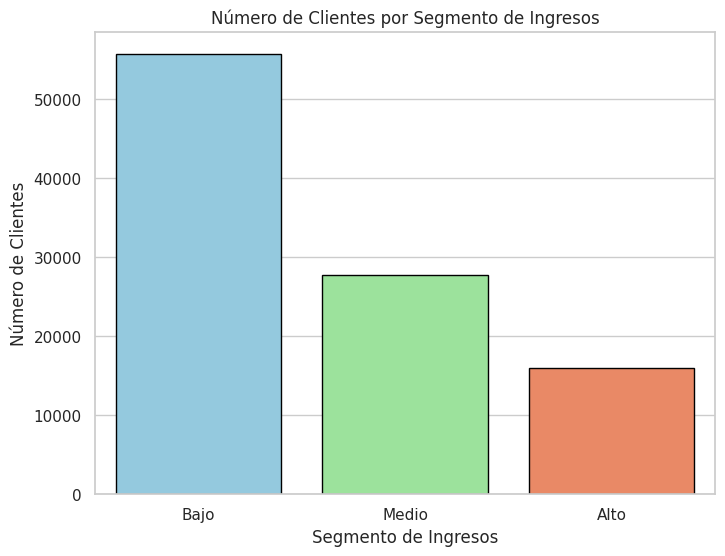

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of customers in each segment
segment_counts = df['RevenueSegment'].value_counts().sort_index()

# Create the bar plot using seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=segment_counts.index, y=segment_counts.values, palette=['skyblue', 'lightgreen', 'coral'])  # Set bar colors using palette

# Add borders to bars
for bar in ax.patches:
  bar.set_edgecolor('black')  # Set border color
  bar.set_linewidth(1)  # Set border width

# Customize the plot
plt.title('Número de Clientes por Segmento de Ingresos')
plt.xlabel('Segmento de Ingresos')
plt.ylabel('Número de Clientes')

# Display the plot
plt.show()

## 7. Conclusiones y Siguientes Pasos

### Insights Obtenidos:

- La segmentación manual usando **pd.cut** permite clasificar a los clientes según su ingreso total, lo que puede ayudar a identificar clientes de alto valor para campañas de fidelización.
- La crosstab entre grupos de edad y segmentos de ingresos revela cómo varían los patrones de compra en función de la edad.

### Siguientes Pasos:

1. Profundizar en cada segmento analizando otros comportamientos (por ejemplo, diversidad de categorías y métodos de pago).
2. Diseñar estrategias de marketing específicas para cada segmento.
3. Integrar estos insights en dashboards interactivos para monitoreo en tiempo real.

Con este flujo de trabajo se demuestra cómo, sin necesidad de algoritmos avanzados, se puede segmentar a los clientes usando reglas definidas y herramientas de transformación de datos en **pandas**. ¡Éxito en tu análisis!